--- Codebookサイズ(N)と階層数(n)のデータ量比較 ---
生点群データサイズ（比較基準）: 320,000 Bytes (0.305 MB)
----------------------------------------------------------------------
N=16: 4 bits/index
  n=3: 321,408 Bytes (0.307 MB) - Exceeds Raw PC size, stopping further n checks for N=16.
N=32: 5 bits/index
  n=3: 401,760 Bytes (0.383 MB) - Exceeds Raw PC size, stopping further n checks for N=32.
N=64: 6 bits/index
  n=2: 321,408 Bytes (0.307 MB) - Exceeds Raw PC size, stopping further n checks for N=64.
N=128: 7 bits/index
  n=2: 374,976 Bytes (0.358 MB) - Exceeds Raw PC size, stopping further n checks for N=128.
N=256: 8 bits/index
  n=2: 428,544 Bytes (0.409 MB) - Exceeds Raw PC size, stopping further n checks for N=256.
----------------------------------------------------------------------
【生点群データサイズ (320,000 Bytes) 以下となる組み合わせ】
----------------------------------------------------------------------
| Raw Point Cloud    | 320,000 Bytes | 0.305 MB |
| N=16, n=1          | 107,136 Bytes | 0.102 MB |
| N=32, n=1    

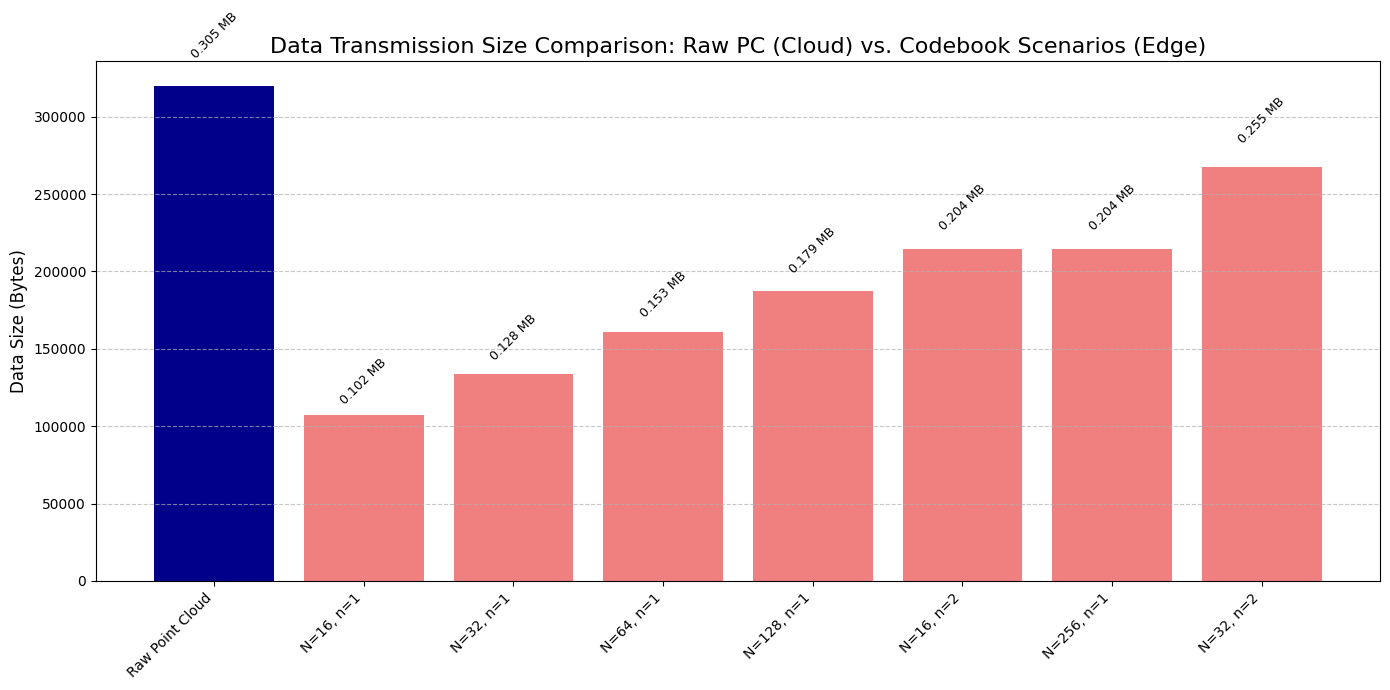

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- 共通パラメータ設定 ---
FLOAT_BITS = 32          # float32 = 32 bits
BYTE_BITS = 8            # 1バイト = 8 ビット
BYTES_PER_FLOAT = FLOAT_BITS / BYTE_BITS # 4 Bytes

# --- ケース1: 生点群データ (Raw Point Cloud) ---
POINTS_PER_FRAME = 20000 # 1フレームあたりの点数
DIMENSIONS_4D = 4        # 各点の次元数 (e.g., x, y, z, intensity)

# 比較基準となる生点群データ量 (Bytes)
data_size_raw_pc_bytes = POINTS_PER_FRAME * DIMENSIONS_4D * BYTES_PER_FLOAT

# --- ケース2: Codebook インデックス (圧縮) - 複数シナリオ ---
H = 496     # 高さ (BEVグリッド)
W = 432     # 幅 (BEVグリッド)
spatial_elements = H * W # 214,322

N_values = [16, 32, 64, 128, 256] # Codebookのサイズ N
max_n_to_check = 20 # 階層数nの最大チェック数 (任意に設定)

scenario_results = {}
# Raw Point Cloudを最初に追加
scenario_results['Raw Point Cloud'] = data_size_raw_pc_bytes 

print("=" * 70)
print("--- Codebookサイズ(N)と階層数(n)のデータ量比較 ---")
print(f"生点群データサイズ（比較基準）: {data_size_raw_pc_bytes:,.0f} Bytes ({data_size_raw_pc_bytes / (1024 * 1024):.3f} MB)")
print("-" * 70)

for N in N_values:
    bits_per_index = np.ceil(np.log2(N))
    
    # Nが16の場合のビット数 (log2(16) = 4 bits)
    print(f"N={N}: {bits_per_index:.0f} bits/index")
    
    for n in range(1, max_n_to_check + 1):
        # 圧縮データ量 (Bytes) = (H * W * log2(N) * n) / 8
        total_bits_compressed = spatial_elements * bits_per_index * n
        data_size_compressed_bytes = total_bits_compressed / BYTE_BITS
        
        # 生点群データより小さい場合のみ記録
        if data_size_compressed_bytes < data_size_raw_pc_bytes:
            label = f"N={N}, n={n}"
            scenario_results[label] = data_size_compressed_bytes
        else:
            # データ量が超えた時点で、そのNについてはこれ以上のnはチェックしない (単調増加のため)
            print(f"  n={n}: {data_size_compressed_bytes:,.0f} Bytes ({data_size_compressed_bytes / (1024 * 1024):.3f} MB) - Exceeds Raw PC size, stopping further n checks for N={N}.")
            break
            
# --- 結果の出力 ---
print("-" * 70)
print("【生点群データサイズ (320,000 Bytes) 以下となる組み合わせ】")
print("-" * 70)

# Codebookの結果をデータ量でソート
codebook_results = dict(sorted({k: v for k, v in scenario_results.items() if k != 'Raw Point Cloud'}.items(), key=lambda item: item[1]))

# 最終的な表示順序 (Raw Point Cloud -> Codebookシナリオ)
final_results = {'Raw Point Cloud': data_size_raw_pc_bytes}
final_results.update(codebook_results)


for label, size_bytes in final_results.items():
    size_MB = size_bytes / (1024 * 1024)
    print(f"| {label.ljust(18)} | {size_bytes:,.0f} Bytes | {size_MB:.3f} MB |")

print("=" * 70)


# --- グラフの表示 ---

labels = list(final_results.keys())
sizes = list(final_results.values())

plt.figure(figsize=(14, 7))
# CodebookのシナリオとRaw Point Cloudを色分け
colors = ['darkblue' if 'Raw' in label else 'lightcoral' for label in labels]

bars = plt.bar(labels, sizes, color=colors)
plt.ylabel('Data Size (Bytes)', fontsize=12)
plt.title('Data Transmission Size Comparison: Raw PC (Cloud) vs. Codebook Scenarios (Edge)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 各バーの上にデータ量を表示 (MB単位)
for bar in bars:
    yval = bar.get_height()
    # CodebookインデックスはRaw PCと比べて非常に小さいため、表示位置を調整
    text_y = yval * 1.05
    plt.text(bar.get_x() + bar.get_width()/2, text_y, 
             f'{yval/1024**2:.3f} MB', ha='center', va='bottom', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()

--- Codebookサイズ(N)と階層数(n)のデータ量比較 ---
生点群データサイズ（比較基準）: 320,000 Bytes (0.305 MB)
----------------------------------------------------------------------
N=16: 4 bits/index
N=32: 5 bits/index
N=64: 6 bits/index
N=128: 7 bits/index
N=256: 8 bits/index
----------------------------------------------------------------------
【生点群データサイズ (320,000 Bytes) 以下となる組み合わせ】
----------------------------------------------------------------------
| Raw Point Cloud    | 320,000 Bytes | 0.305 MB |
| N=16, n=1          | 26,784 Bytes | 0.026 MB |
| N=32, n=1          | 33,480 Bytes | 0.032 MB |
| N=64, n=1          | 40,176 Bytes | 0.038 MB |
| N=128, n=1         | 46,872 Bytes | 0.045 MB |
| N=16, n=2          | 53,568 Bytes | 0.051 MB |
| N=256, n=1         | 53,568 Bytes | 0.051 MB |
| N=32, n=2          | 66,960 Bytes | 0.064 MB |
| N=16, n=3          | 80,352 Bytes | 0.077 MB |
| N=64, n=2          | 80,352 Bytes | 0.077 MB |
| N=128, n=2         | 93,744 Bytes | 0.089 MB |
| N=32, n=3          | 100,440 B

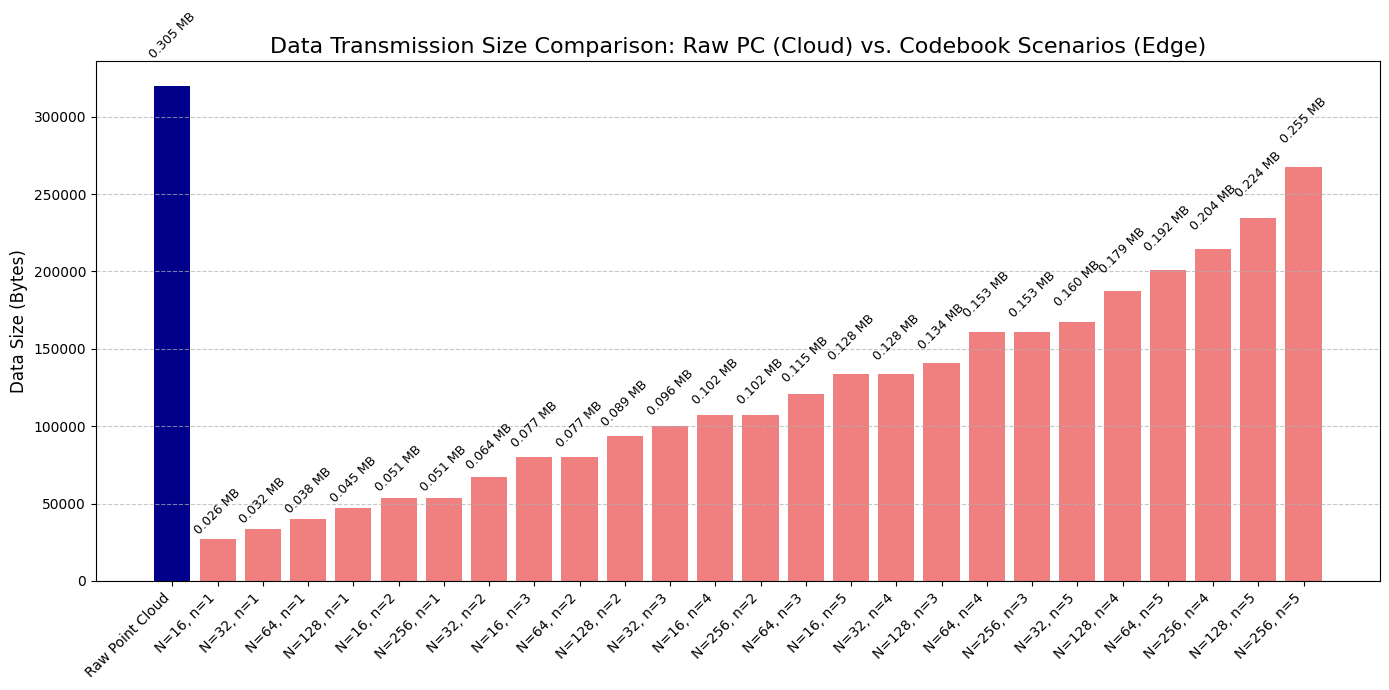

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 共通パラメータ設定 ---
FLOAT_BITS = 32          # float32 = 32 bits
BYTE_BITS = 8            # 1バイト = 8 ビット
BYTES_PER_FLOAT = FLOAT_BITS / BYTE_BITS # 4 Bytes

# --- ケース1: 生点群データ (Raw Point Cloud) ---
POINTS_PER_FRAME = 20000 # 1フレームあたりの点数
DIMENSIONS_4D = 4        # 各点の次元数 (e.g., x, y, z, intensity)

# 比較基準となる生点群データ量 (Bytes)
data_size_raw_pc_bytes = POINTS_PER_FRAME * DIMENSIONS_4D * BYTES_PER_FLOAT

# --- ケース2: Codebook インデックス (圧縮) - 複数シナリオ ---
H = 248     # 高さ (BEVグリッド)
W = 216     # 幅 (BEVグリッド)
spatial_elements = H * W # 214,322

N_values = [16, 32, 64, 128, 256] # Codebookのサイズ N
max_n_to_check = 5 # 階層数nの最大チェック数 (任意に設定)

scenario_results = {}
# Raw Point Cloudを最初に追加
scenario_results['Raw Point Cloud'] = data_size_raw_pc_bytes 

print("=" * 70)
print("--- Codebookサイズ(N)と階層数(n)のデータ量比較 ---")
print(f"生点群データサイズ（比較基準）: {data_size_raw_pc_bytes:,.0f} Bytes ({data_size_raw_pc_bytes / (1024 * 1024):.3f} MB)")
print("-" * 70)

for N in N_values:
    bits_per_index = np.ceil(np.log2(N))
    
    # Nが16の場合のビット数 (log2(16) = 4 bits)
    print(f"N={N}: {bits_per_index:.0f} bits/index")
    
    for n in range(1, max_n_to_check + 1):
        # 圧縮データ量 (Bytes) = (H * W * log2(N) * n) / 8
        total_bits_compressed = spatial_elements * bits_per_index * n
        data_size_compressed_bytes = total_bits_compressed / BYTE_BITS
        
        # 生点群データより小さい場合のみ記録
        if data_size_compressed_bytes < data_size_raw_pc_bytes:
            label = f"N={N}, n={n}"
            scenario_results[label] = data_size_compressed_bytes
        else:
            # データ量が超えた時点で、そのNについてはこれ以上のnはチェックしない (単調増加のため)
            print(f"  n={n}: {data_size_compressed_bytes:,.0f} Bytes ({data_size_compressed_bytes / (1024 * 1024):.3f} MB) - Exceeds Raw PC size, stopping further n checks for N={N}.")
            break
            
# --- 結果の出力 ---
print("-" * 70)
print("【生点群データサイズ (320,000 Bytes) 以下となる組み合わせ】")
print("-" * 70)

# Codebookの結果をデータ量でソート
codebook_results = dict(sorted({k: v for k, v in scenario_results.items() if k != 'Raw Point Cloud'}.items(), key=lambda item: item[1]))

# 最終的な表示順序 (Raw Point Cloud -> Codebookシナリオ)
final_results = {'Raw Point Cloud': data_size_raw_pc_bytes}
final_results.update(codebook_results)


for label, size_bytes in final_results.items():
    size_MB = size_bytes / (1024 * 1024)
    print(f"| {label.ljust(18)} | {size_bytes:,.0f} Bytes | {size_MB:.3f} MB |")

print("=" * 70)


# --- グラフの表示 ---

labels = list(final_results.keys())
sizes = list(final_results.values())

plt.figure(figsize=(14, 7))
# CodebookのシナリオとRaw Point Cloudを色分け
colors = ['darkblue' if 'Raw' in label else 'lightcoral' for label in labels]

bars = plt.bar(labels, sizes, color=colors)
plt.ylabel('Data Size (Bytes)', fontsize=12)
plt.title('Data Transmission Size Comparison: Raw PC (Cloud) vs. Codebook Scenarios (Edge)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 各バーの上にデータ量を表示 (MB単位)
for bar in bars:
    yval = bar.get_height()
    # CodebookインデックスはRaw PCと比べて非常に小さいため、表示位置を調整
    text_y = yval * 1.05
    plt.text(bar.get_x() + bar.get_width()/2, text_y, 
             f'{yval/1024**2:.3f} MB', ha='center', va='bottom', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()